# Mechanics Lab IX –  Inertial forces on the earth

For today's lab you'll be examining the effect of the Coriolis force on the surface of the earth. 
Generally we don't notice the non-inertial forces acting on us as the earth rotates. However, at sufficiently high velocities and over large enough distances the Coriolis force can have real world effects. For instance, it drives weather patterns, and legend has it that it threw off British gunman in a WWI battle near the Falkland Islands. 

For the sake of simplicity, we'll ignore the centrifugal force in this lab even though it frequently also has a component tangent to the surface of the earth.


## Objectives

In this lab you will 
* determine how to express the Coriolis force in spherical coordinates,
* numerically calculate the trajectory of a object constrained to the surface of a sphere under the influence of the Coriolis force,
* test your code by examining special cases and conserved properties,
* and apply your code to real-world situations.


In [1]:
%pylab inline
from scipy.integrate import odeint  # import the differential equation integrator

Populating the interactive namespace from numpy and matplotlib


## Equations of motion
Let's assume an object is fixed to the surface of the of a perfectly spherical earth. In this case the normal force will perfectly balance the radial component of the net force, and there will be zero velocity or acceleration in the radial direction.

To take advantage of this lovely symmetry, we will want to work the problem in spherical coordinates. Similarly to in polar coordinates, the unit vectors change direction with position. In spherical coordinates

$$ d \hat r/d t = \dot \theta \hat \theta  +  sin \theta\dot \phi \hat \phi$$
$$ d \hat \phi /d t = - sin \theta \dot \phi \hat r - cos \theta \dot \phi \hat \theta$$
$$ d \hat \theta /d t = - \dot \theta \hat r + cos \theta \dot \phi \hat \phi$$

Therefore, when taking the derivatives of the position vector we find

$$ \vec r = r \hat r $$

$$ \vec v = \dot r \hat r + r sin \theta \dot \phi  \hat \phi + r \dot \theta \hat \theta $$

$$ \vec a = (\ddot r - r sin^2 \theta \dot \phi^2  - r \dot \theta^2) \hat r + (2 sin
\theta  \dot r \dot \phi + r sin \theta \ddot \phi + 2 r cos \theta \dot \phi \dot \theta) \hat \phi + (2 \dot r \dot \theta - r sin \theta cos \theta \dot \phi^2 + r \ddot \theta) \hat \theta $$

Using these equations for acceleration, we can write down the equations of motion. For example, since we know that the object won't be accelerating in $\hat r$, it is trivial to write the equation of motion in that direction:

$$ F_r = m a_r = m(\ddot r - r \dot \phi^2 sin^2 \theta - r \dot \theta^2) = 0 $$

To find the equations of motion in $\hat \phi$ and $\hat \theta$, we need to be able to express the forces (in this case, the Coriolis force) that can have a non-zero component in those directions. As you know, $ \vec F_{cor} = 2m \vec v \times \vec \Omega = -2m \vec \Omega \times \vec v $. For an object on the surface of the earth, $ \vec \Omega = \Omega \hat z$ and $\vec v = v_{\theta} \hat \theta + v_{\phi} \hat \phi$. 


#### Exercise 9.1 
In your lab notebook, work out $\vec F_{cor}$ for an object on the surface of the earth in spherical coordinates. You'll need to use the following relations (use your right hand to verify the directions to yourself before solving for the Coriolis force.)

$$ \hat z \times \hat r = -\hat r \times \hat z  = \hat \phi sin\theta$$
$$ \hat z \times \hat \theta = -\hat \theta \times \hat z = \hat \phi cos \theta $$
$$ \hat z \times \hat \phi = -\hat \phi \times \hat z = - \hat r sin \theta - \hat \theta cos \theta $$


#### Exercise 9.2
Now use your equations for the Coriolis force and acceleration in a spherical coordinate system to write the equations of motion in $\phi$ and $\theta$. Sub in for $v_\theta$ and $v_\phi$ (if you haven't done so already), simplify as much as possible, and solve for $\ddot \phi$ and $\ddot \theta$. Then check your results with your lab instructor. (Hint: what is $\dot r$?)

## Solving the equations of motion
Now that you have the equations of motion, it's time to compute the numerical solution. 

### Setting the initial conditions and other physical parameters
#### Exercise 9.3
Define the parameters of the problem and the initial conditions in the cell below. For now, set the radius of the earth to 1 and the angular speed of the earth, $\Omega$, to 0.1.  Let your initial conditions be $\phi_0 = \pi/4$, $\dot \phi_0 = 0$, $\theta_0 = \pi/4$, $\dot \theta_0 = 0.1$. 

In [2]:
# Defining constants (r and omega) and the initial conditions
r=1
meg=0.1
phi0=pi/4
phidot0=0
theta0=pi/4
thetadot0=0.1


### Numerical integration
 
#### Exercise 9.4
Define a function that will return the derivatives for your four variables, $\phi, \dot \phi, \theta$, and $\dot \theta$. Then use odeint to solve for $0 \leq t \ \leq t_{max}$. Set the maximum time to a reasonable amount (about the time it would take for the object to circumnavigate the world at its initial velocity is a good first estimate). In order to ensure an accurate calculation set rtol=1.0e-11 and atol=1.0e-11 in your call to odeint.

In [3]:
# Define the deriv function
def deriv(f,t,param):
    phi=f[0]
    dphidt=f[1]
    theta=f[2]
    dthetadt=f[3]
    
    meg_deriv=param[0]
    
    d2phidt2=-2*f[3]*(1/tan(f[2]))*(f[1]+param[0])
    d2thetadt2=sin(f[2])*cos(f[2])*(f[1]**2 + 2*param[0]*f[1])
   
    
    return[dphidt,d2phidt2,dthetadt,d2thetadt2]


param0=array([meg])
f_init=array([phi0,phidot0,theta0,thetadot0])
# Use odeint to integrate the equations of motion
time=arange(0,225,0.001)
f_solun=odeint(deriv,f_init,time,args=(param0,),rtol=1.0e-11,atol=1.0e-11)


#### Exercise 9.5
Check your integration by first plotting $\theta$ (colatitude) in degrees vs. $\phi$ (longitude) in degrees. Set the axes of your plot so that the entire possible range of $\phi$ and $\theta$ are visible. 

You may also wish to adjust your plotting so that values of $\phi$ wrap around. In other words, $\phi$ should be limited to the range $-\pi < \phi \leq \pi$. To do this, check out the modulus operator, %.

(-180, 180)

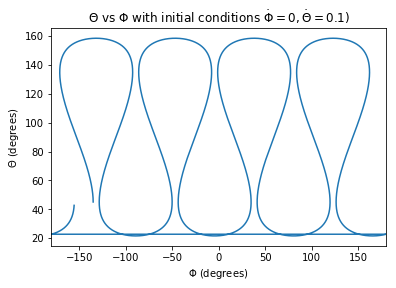

In [4]:
# Plots go here:
phideg=(f_solun[:,0]*(180/pi)%360)-180
thetadeg=f_solun[:,2]*(180/pi)
plt.plot(phideg,thetadeg)
plt.ylabel("$\Theta$ (degrees)")
plt.xlabel("$\Phi$ (degrees)")
plt.title("$\Theta$ vs $\Phi$ with initial conditions $\dot \Phi =0, \dot \Theta =0.1$)")
xlim(-180,180)

### Plotting on the surface of a sphere

You can make a potentially more meaningful plot by plotting in 3-D on the surface of a sphere. The following section of code will walk you through how to do this.

#### Exercise 9.6
First, write formulas to calculate the cartesian coordinates of the object based on $\phi$ and $\theta$


In [5]:
# Transformation from spherical to cartesian coordinates

x = sin(f_solun[:,2])*cos(f_solun[:,0]) ### FIX
y = sin(f_solun[:,2])*sin(f_solun[:,0]) ### FIX
z = cos(f_solun[:,2]) ### FIX



#### Exercise 9.7
The following code plots a wire-frame sphere in 3-D. Add a command to plot the (x,y,z) coordinates you calculated above on the sphere using the command *ax.plot(x, y, z)*. If you would like to see the sphere from a different viewing angle, change the values of elev and azim in "ax.view_init."

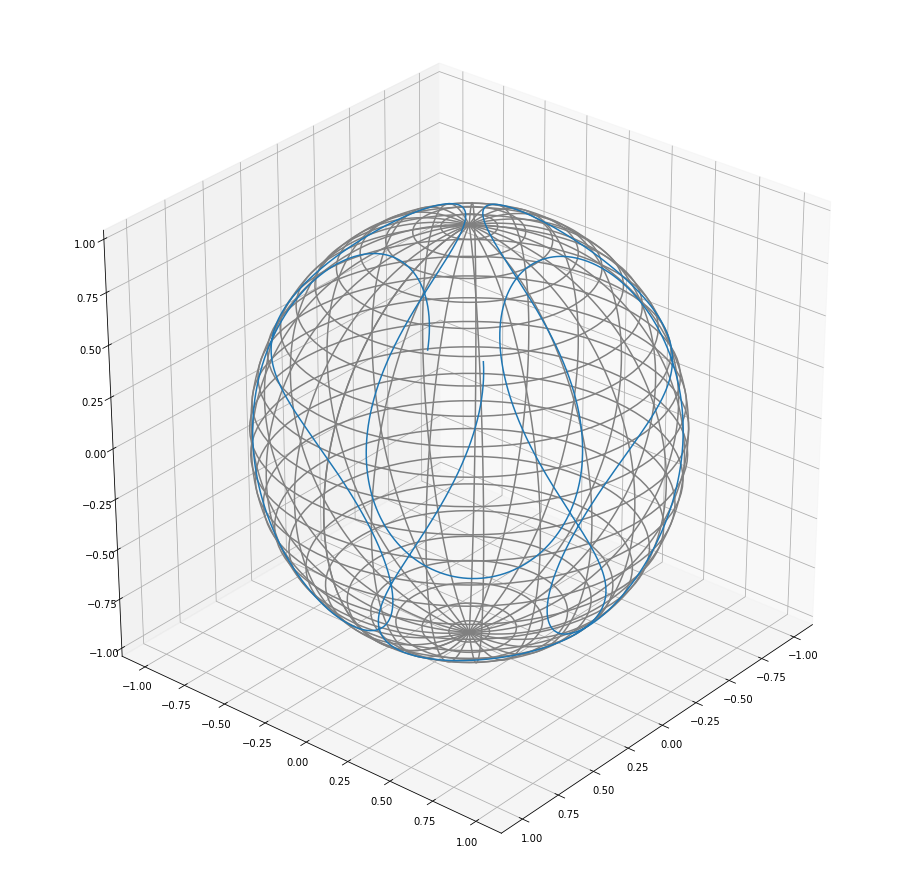

In [6]:
from mpl_toolkits.mplot3d import Axes3D

# Set of all spherical angles:
u = linspace(0, 2*pi, 100)
v = linspace(0, pi, 100)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an sphere):
x_sphere = r*outer(cos(u), sin(v))
y_sphere = r*outer(sin(u), sin(v))
z_sphere = r*outer(ones_like(u), cos(v))

# Plot:
fig = plt.figure(figsize=plt.figaspect(1)*4)  # Square figure
ax = fig.add_subplot(111, projection='3d') # Add a 3-D subplot
ax.plot_wireframe(x_sphere, y_sphere, z_sphere,  rstride=4, cstride=4, color='0.5') #Plot a sphere
ax.view_init(elev=30.,azim=40) #Change the orientation of the plot

# Add call to plot the trajectory below
ax.plot(x,y,z)


## Verifying your code

#### Exercise 9.8
Verify your integration by changing the initial conditions to check at least **two** special cases. Explain whether the results are what you predicted. Include your plots below.

   /  (double-click to add text)
   /  
   /  
   /  We considered the case where dphi=0,dtheta=0.1, omega =0. We expected the motion of the object to be only in the theta direction, which is what the plot below shows.
   /  
   /  We also considered the case where dphi = pi/4, dtheta =0, and omega=0.1 We expected the motion of the object in the phi direction to be much greater over time, and this is what the plot shows.
   /  
   /  
   /  
   / 

(-180, 180)

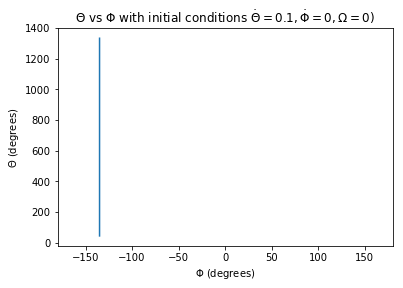

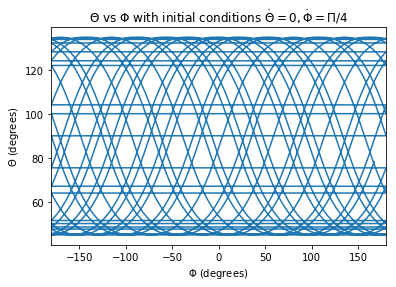

In [7]:
#Include plots here
r1=1
meg1=0
phi1=pi/4
phidot1=0
theta1=pi/4
thetadot1=0.1


param1=array([meg1])
f_init1=array([phi1,phidot1,theta1,thetadot1])
# Use odeint to integrate the equations of motion
time1=arange(0,225,0.001)
f_1=odeint(deriv,f_init1,time1,args=(param1,),rtol=1.0e-11,atol=1.0e-11)


r2=1
meg2=0.1
phi2=pi/4
phidot2=pi/4
theta2=pi/4
thetadot2=0


param2=array([meg2])
f_init2=array([phi2,phidot2,theta2,thetadot2])
# Use odeint to integrate the equations of motion
time2=arange(0,225,0.001)
f_2=odeint(deriv,f_init2,time2,args=(param2,),rtol=1.0e-11,atol=1.0e-11)




phideg1=(f_1[:,0]*(180/pi)%360)-180
thetadeg1=f_1[:,2]*(180/pi)

phideg2=(f_2[:,0]*(180/pi)%360)-180
thetadeg2=f_2[:,2]*(180/pi)

figure(1)
plt.plot(phideg1,thetadeg1)
plt.ylabel("$\Theta$ (degrees)")
plt.xlabel("$\Phi$ (degrees)")
plt.title("$\Theta$ vs $\Phi$ with initial conditions $\dot \Theta =0.1, \dot \Phi =0, \Omega =0$)")
xlim(-180,180)

figure(2)
plt.plot(phideg2,thetadeg2)
plt.ylabel("$\Theta$ (degrees)")
plt.xlabel("$\Phi$ (degrees)")
plt.title("$\Theta$ vs $\Phi$ with initial conditions $\dot \Theta =0, \dot \Phi = \Pi /4$")
xlim(-180,180)

In [8]:
r1=1
meg1=0.1
phi1=pi/2
phidot10=0
theta1=pi/4
thetadot1=0.2


param1=array([meg1])
f_init1=array([phi1,phidot1,theta1,thetadot1])
# Use odeint to integrate the equations of motion
time=arange(0,225,0.001)
f_1=odeint(deriv,f_init1,time,args=(param1,),rtol=1.0e-11,atol=1.0e-11)


#f_1=odeint(deriv,f_init,time,args=(param0,),rtol=1.0e-11,atol=1.0e-11)

In [9]:
r2=1
meg2=0.4
phi2=pi/4
phidot2=0
theta2=pi/4
thetadot2=0.4


param2=array([meg2])
f_init2=array([phi2,phidot2,theta2,thetadot2])
# Use odeint to integrate the equations of motion
time=arange(0,225,0.001)
f_2=odeint(deriv,f_init2,time,args=(param2,),rtol=1.0e-11,atol=1.0e-11)

#f_2=odeint(deriv,f_init,time,args=(param0,),rtol=1.0e-11,atol=1.0e-11)

Another way to verify your code to examine the speed of the mass over time.

#### Exercise 9.9
How do you expect the Coriolis force to affect the speed of the mass? (Hint: how much work does the Coriolis force do?)

    \ (double-click to add text)
    \
    \The Coriolis Force should have no effect on the speed, because all of the acceleration is         perpendicular to the velocity.
    \
    \
    \

#### Exercise 9.10
Revert your initial conditions back to your first ones. Include the following two plots below: 1) the speed of the puck, the component of the velocity in $\phi$, and the component of the velocity in $\theta$ versus time and 2) the fractional amount the speed changes over time ($(v - v_{init})/v_{init}$ versus t). Make any necessary changes to your integrator and use your velocity plots to justify the accuracy of your code.

    \ (double-click to add text)
    \
    \ The two graphs complement each other's results. The total speed seen on the first graph     appears constant, and the second graph shows that the speed is changing extremely slowly. We can attribute this change to error in the numerical integration.
    \
    \
    \

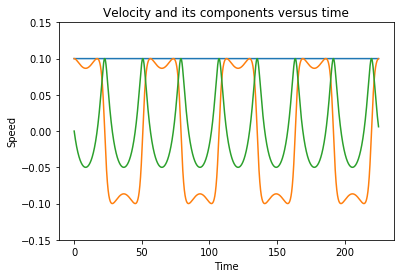

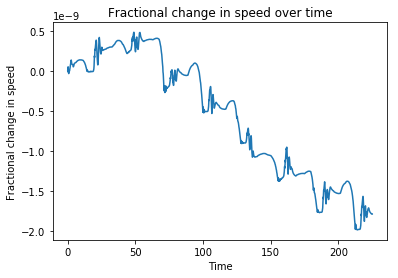

In [10]:
# Include plots here

r=1
meg=0.1
phi0=pi/4
phidot0=0
theta0=pi/4
thetadot0=0.1
vinit = ((r * thetadot0)**2 + (r * sin(theta0) * phidot0)**2)**0.5

param0=array([meg])
f_init=array([phi0,phidot0,theta0,thetadot0])
time=arange(0,225,0.001)
f_solun=odeint(deriv,f_init,time,args=(param0,),rtol=1.0e-11,atol=1.0e-11)


vtheta = r * f_solun[:,3]
vphi = r *sin(f_solun[:,2]) * f_solun[:,1]
v = (vtheta**2 + vphi**2)**0.5
vchange = ((v-vinit)/v)

figure(1)
plot(time,v)
plot(time,vtheta)
plot(time,vphi)
ylim(-0.15,0.15)
title("Velocity and its components versus time")
xlabel("Time")
ylabel("Speed")

figure(2)
plot(time,vchange)
title("Fractional change in speed over time")
xlabel("Time")
ylabel("Fractional change in speed")

## Explore different initial conditions

#### Exercise 9.11
Run your code again using additional initial conditions to answer the following questions. You may wish to change the max_time for your integration as you explore these.

1) What happens to the trajectory as the initial value of $\phi$ increases? Is this what you would have expected? Why?

   /  (double-click to add text)
   /  
   /  Nothing happens to the trajectory, other than the trajectory being shifted in location. This makes sense, because phi has no effect on acceleration.
   
   /  
   /  
   /  
   /  
   /  
   /  
   / 
   
2) What happens to the trajectory as the initial value of $\theta$ increases? Is this what you would have expected? Why?

   /  (double-click to add text)
   /  
   /  As the intial value of theta increases, the trajectory becomes smoother. This is expected because the coriolis force decreases.
   /  
   /  
   /  
   /  
   /  
   /  
   / 
   
3) What happens to the trajectory if the initial velocity is in $\hat \phi$ instead of $\hat \theta$?

   /  (double-click to add text)
   /  
   /  The trajectory has wider loops in the phi direction, which is expected because it has a greater phi velocity.
   /  
   /  
   /  
   /  
   /  
   /  
   / 
   
4) What happens to the trajectory as the initial velocity decreases?

   /  (double-click to add text)
   /  
   /  The trajectory sticks to the rotation of the earth, which makes sense because it does not have enough velocity to really move to different points on the planet.
   /  
   /  
   /  
   /  
   /  
   /  
   / 

(-180, 180)

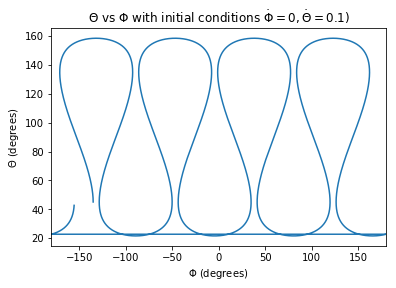

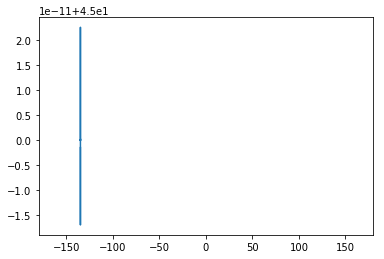

In [28]:
r=1
meg=0.1
phi0=pi/4
phidot0=0
theta0=pi/4
thetadot0=0.1
vinit = ((r * thetadot0)**2 + (r * sin(theta0) * phidot0)**2)**0.5

param0=array([meg])
f_init=array([phi0,phidot0,theta0,thetadot0])
time=arange(0,225,0.001)
f_solun=odeint(deriv,f_init,time,args=(param0,),rtol=1.0e-11,atol=1.0e-11)


vtheta = r * f_solun[:,3]
vphi = r *sin(f_solun[:,2]) * f_solun[:,1]
v = (vtheta**2 + vphi**2)**0.5
vchange = ((v-vinit)/v)

figure(1)
phideg=(f_solun[:,0]*(180/pi)%360)-180
thetadeg=f_solun[:,2]*(180/pi)
plt.plot(phideg,thetadeg)
plt.ylabel("$\Theta$ (degrees)")
plt.xlabel("$\Phi$ (degrees)")
plt.title("$\Theta$ vs $\Phi$ with initial conditions $\dot \Phi =0, \dot \Theta =0.1$)")
xlim(-180,180)

r=1
meg=0.1
phi0=pi/4
phidot0=0
theta0=pi/4
thetadot0=0.000000000000000001
param0=array([meg])
f_init=array([phi0,phidot0,theta0,thetadot0])
time=arange(0,225,0.001)
f_solun=odeint(deriv,f_init,time,args=(param0,),rtol=1.0e-11,atol=1.0e-11)


figure(2)
phideg=(f_solun[:,0]*(180/pi)%360)-180
thetadeg=f_solun[:,2]*(180/pi)
plt.plot(phideg,thetadeg)
xlim(-180,180)


## Integrate with realistic parameters
Now, try running your code with some realistic values. 

#### Exercise 9.12
Change the parameters to reflect the earth's actual radius and angular velocity in SI units.

In [200]:
# Actual values of the earth's angular velocity (omega) and radius (r)
meg = 7.29 * (10**-5)
r = 6371000

#### Exercise 9.13
Calculate and plot (in colatitude vs longitude space) what the trajectory of a bullet fired East at 400 m/s from Grinnell, IA will be. For this you'll have to look up the coordinates of Grinnell and translate the velocity into spherical coordinates. (Notice that here we are neglecting how the Coriolis (or centrifugal) force would affect the altitude of the bullet.) Use odeint to solve for the trajectory of the bullet for $ 0 \leq t \le 10$ seconds.

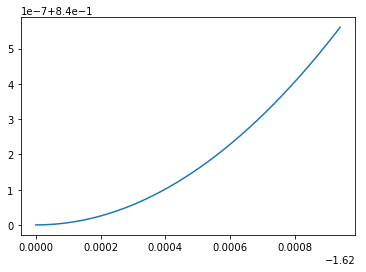

In [206]:
# Trajectory of bullet fired East at 400 m/s from Grinnell, IA
# Fill in code to set initial conditions, integrate, and plot below.
phi0 = -1.62
dphi0 = (400/(r*cos(0.84)))
theta0 = 0.84
dtheta0 = 0

param0=array([meg])
f_init=array([phi0,dphi0,theta0,dtheta0])
time=arange(0,10,0.00001)
f_solun=odeint(deriv,f_init,time,args=(param0,),rtol=1.0e-11,atol=1.0e-11)
plt.plot(f_solun[:,0],f_solun[:,2])


#### Exercise 9.14
After 10 seconds how far North-South has the bullet traveled? Compare this to the approximate distance traveled East.

   /  (double-click to add text)
   /  
   /  The bullet travels 3999.99 meters East and 3.57 meters South.
   
   /  
   /  
   /  
   /  
   /  
   /  
   / 

In [207]:
#Calculation of distance traveled North-South and East.
Echange = r*cos(theta0)*(f_solun[-1,0]-phi0)
Schange = r*(f_solun[-1,2]-theta0)
print(Echange)
print(Schange)

3999.99362108
3.57225885095


#### Exercise 9.15
Now let's assume you are a British gunman in 1914 sailing near the Falkland islands (latitude of 52 degrees south, longitude 59 degrees west) on the battleship *Inflexible*. You are firing directly at the German battleship *Dresden*, which is ten miles to the south of you. Assuming a muzzle-speed of 1800 feet per second, calculate and plot the trajectory of the shell.

By reading off from a plot, determine how much and in what direction will the shell be deflected after it has traveled ten miles south?


The shell will be deflected 145 feet east.

145.076005332
52799.281661


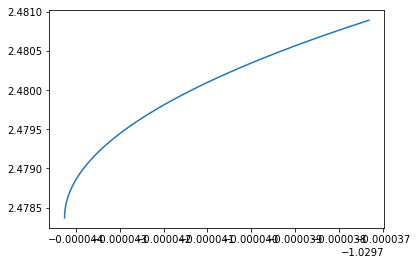

In [198]:
# Fill in code to set initial conditions, integrate, and plot below.

r=20900000
phi0 = -(59 * (pi/180))
dphi0 = 0
theta0 = (52 + 90)*(pi/180)
dtheta0 = 1800/r

param0=array([meg])
f_init=array([phi0,dphi0,theta0,dtheta0])
time=arange(0,29.333,0.00001)
f_solun=odeint(deriv,f_init,time,args=(param0,),rtol=1.0e-11,atol=1.0e-11)
plt.plot(f_solun[:,0],f_solun[:,2])

Echange = r*(f_solun[-1,0]-phi0)
Schange = r*(f_solun[-1,2]-theta0)
print(Echange)
print(Schange)

## Check-out
#### Exercise 9.16

Briefly summarize in the cell below the ideas in today's lab.

   /  (double-click to enter text)
   /  
   /  The coriolis effect causes objects that are moving on a rotating sphere to drift off course slightly.
   /  Polar coordinates and how to use them.
   /  How initial conditions effect movement on Earth.
   /  Calculating the effect of the coriolis effect on moving objects.
   /  
   /  
   /  
   / 

## Challenge Problem

Complete the following exercises if you have extra time once you have completed the rest of the lab. These exercises are all centered on adding the centrifugal force.

* See if you can repeat your integration now including the tangental component of the centrifugal force. 
* Re-do your plots from exercises 9.5 -- 9.7 (with the same parameters and initial conditions), and compare the trajectories with the centrifugal force is included and not. 
* Try starting your mass with zero velocity and calculating its trajectory when the centrifugal force is included.